# **7.1 시계열 문제**

# **7.2 AR, MA, ARMA, ARIMA**

## **7.2.1 AR 모델**

## **7.2.2 MA 모델**

## **7.2.3 ARMA 모델**

## **7.2.4 ARIMA 모델**

**`statsmodels` 라이브러리 설치**

In [ ]:
pip install statsmodels

**`ARIMA()` 함수 호출, `sales` 데이터셋에 대한 예측**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


<ipython-input-10-e75f30616811>:10: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  series=read_csv('/content/drive/MyDrive/24-2/EURON/과제/Week10/sales.csv', header=0, parse_dates=[0], index_col=0,
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                  Sales   No. Observations:                   36
Model:                 ARIMA(5, 1, 0)   Log Likelihood                -199.651
Date:                Mon, 25 Nov 2024   AIC                            411.302
Time:                        00:39:23   BIC                            420.634
Sample:                    01-01-1991   HQIC                           414.523
                         - 12-01-1993                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8788      0.227     -3.876      0.000      -1.323      -0.434
ar.L2         -0.2787      0.232     -1.203      0.229      -0.733       0.176
ar.L3         -0.0076      0.270     -0.028      0.9

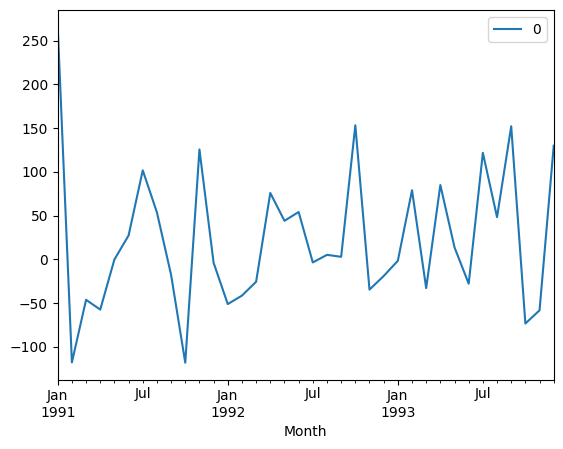

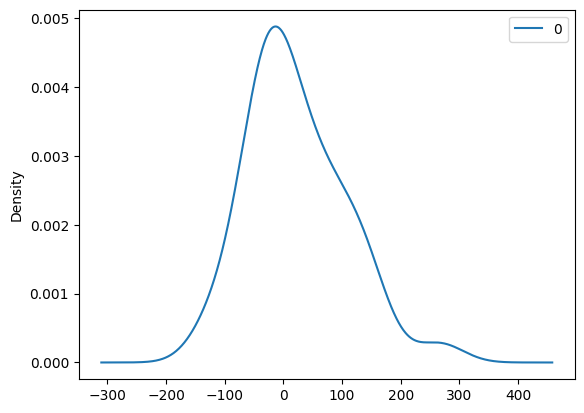

                0
count   36.000000
mean    22.459086
std     82.505331
min   -118.213281
25%    -33.308343
50%      1.361178
75%     76.704967
max    266.000000


In [ ]:
from pandas import read_csv
from datetime import datetime
from pandas import DataFrame
from statsmodels.tsa.arima.model import ARIMA
from matplotlib import pyplot

def parser(x):
  return datetime.strptime('199'+x, '%Y-%m')

series=read_csv('/content/drive/MyDrive/24-2/EURON/과제/Week10/sales.csv', header=0, parse_dates=[0], index_col=0,
                date_parser=parser)
series=series.squeeze('columns')
model=ARIMA(series, order=(5, 1, 0))
model_fit=model.fit()
print(model_fit.summary())
residuals=DataFrame(model_fit.resid)
residuals.plot()
pyplot.show()
residuals.plot(kind='kde')
pyplot.show()
print(residuals.describe())

➡️오류 분포가 치우쳐 있다.
  * 오류 평균(`mean`) 값이 0이 아니다.

**`ARIMA()` 예측**

<ipython-input-11-1cf1186d586d>:11: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  series=read_csv('/content/drive/MyDrive/24-2/EURON/과제/Week10/sales.csv', header=0, parse_dates=[0], index_col=0, date_parser=parser)
<ipython-input-11-1cf1186d586d>:26: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('predicted=%f, expected=%f' % (yhat, obs))


predicted=352.855343, expected=346.300000
predicted=277.398036, expected=329.700000
predicted=368.753734, expected=445.400000
predicted=331.773635, expected=325.900000
predicted=372.070405, expected=449.300000
predicted=360.020872, expected=411.300000
predicted=454.526230, expected=417.400000
predicted=388.690699, expected=545.500000
predicted=437.632447, expected=477.600000
predicted=516.437624, expected=687.000000
predicted=520.916190, expected=435.300000
predicted=675.594647, expected=587.300000
predicted=505.201016, expected=676.900000
Test MSE: 29480.541


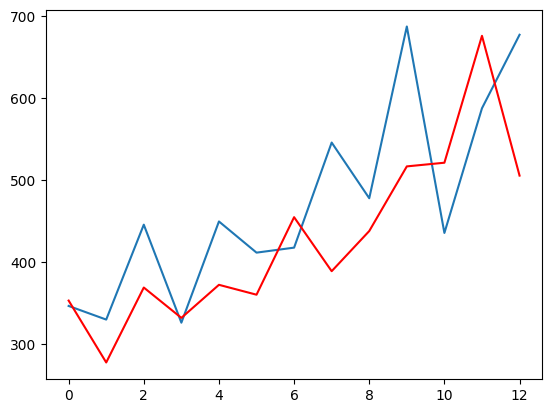

In [ ]:
import numpy as np
from pandas import read_csv
from datetime import datetime
from matplotlib import pyplot
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

def parser(x):
  return datetime.strptime('199'+x, '%Y-%m')

series=read_csv('/content/drive/MyDrive/24-2/EURON/과제/Week10/sales.csv', header=0, parse_dates=[0], index_col=0, date_parser=parser)
X=series.values
X=np.nan_to_num(X)
size=int(len(X)*0.66)
train, test=X[0:size], X[size:len(X)]
history=[x for x in train]
predictions=list()
for t in range(len(test)):
  model=ARIMA(history, order=(5, 1, 0))
  model_fit=model.fit()
  output=model_fit.forecast()
  yhat=output[0]
  predictions.append(yhat)
  obs=test[t]
  history.append(obs)
  print('predicted=%f, expected=%f' % (yhat, obs))

error=mean_squared_error([obs], [yhat])
print('Test MSE: %.3f' % error)
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()

* 빨간색: 실제 데이터
* 파란색: 모형 실행 결과

➡️우상향 추세를 나타내고 있으므로, 자전거 판매가 향후에도 계속 증가할 것이다.

📍ARIMA를 사용하면 데이터 경향을 파악해서 미래를 예측할 수 있다.

# **7.3 순환 신경망(RNN)**

1. 일대일
2. 일대다
3. 다대일
4. 다대다
5. 동기화 다대다

**다대일 구조 예시 코드**
```
self.em=nn.Embedding(len(TEXT.vocab.stoi), embeding_dim)
self.rnn=nn.RNNCell(input_dim, hidden_size)
self.fc1=nn.Linear(hidden_size, 256)
self.fc2=nn.Linear(256, 3)
```

**다대다 구조 예시 코드(파이토치)**
```
Seq2Seq(
    (encoder): Encoder(
        (embedding): Embedding(7855, 256)
        (rnn): LSTM(256, 512, num_layers=2, dropout=0.5)
        (dropout): Dropout(p=0.5, inplace=False)
    )
    (decoder): Decoder(
        (embedding): Embedding(5893, 256)
        (rnn): LSTM(256, 512, num_layers=2, dropout=0.5)
        (dropout): Dropout(p=0.5, inplace=False)
    )
)
```

### **7.3.1 RNN 계층과 셀**

## **7.4 RNN 구조**

### **7.4.1 RNN 셀 구현**

In [4]:
%pip install torch==1.10.0
%pip install torchtext==0.11.0

Note: you may need to restart the kernel to use updated packages.


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
You should consider upgrading via the 'c:\Users\User\AppData\Local\Programs\Python\Python38\python.exe -m pip install --upgrade pip' command.


Note: you may need to restart the kernel to use updated packages.


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
You should consider upgrading via the 'c:\Users\User\AppData\Local\Programs\Python\Python38\python.exe -m pip install --upgrade pip' command.


**라이브러리 호출**

In [2]:
import torch
import torchtext
import numpy as np
import torch.nn as nn
import torch.nn.functional as F
import time

c:\Users\User\AppData\Local\Programs\Python\Python38\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


**데이터 전처리**

In [3]:
start=time.time()
TEXT=torchtext.legacy.data.Field(lower=True, fix_length=200, batch_first=False)
LABEL=torchtext.legacy.data.Field(sequential=False)

**데이터셋 준비**

In [4]:
from torchtext.legacy import datasets

train_data, test_data=datasets.IMDB.splits(TEXT, LABEL)

**추천 데이터셋 내용 확인**

In [5]:
print(vars(train_data.examples[0]))

{'text': ['bromwell', 'high', 'is', 'a', 'cartoon', 'comedy.', 'it', 'ran', 'at', 'the', 'same', 'time', 'as', 'some', 'other', 'programs', 'about', 'school', 'life,', 'such', 'as', '"teachers".', 'my', '35', 'years', 'in', 'the', 'teaching', 'profession', 'lead', 'me', 'to', 'believe', 'that', 'bromwell', "high's", 'satire', 'is', 'much', 'closer', 'to', 'reality', 'than', 'is', '"teachers".', 'the', 'scramble', 'to', 'survive', 'financially,', 'the', 'insightful', 'students', 'who', 'can', 'see', 'right', 'through', 'their', 'pathetic', "teachers'", 'pomp,', 'the', 'pettiness', 'of', 'the', 'whole', 'situation,', 'all', 'remind', 'me', 'of', 'the', 'schools', 'i', 'knew', 'and', 'their', 'students.', 'when', 'i', 'saw', 'the', 'episode', 'in', 'which', 'a', 'student', 'repeatedly', 'tried', 'to', 'burn', 'down', 'the', 'school,', 'i', 'immediately', 'recalled', '.........', 'at', '..........', 'high.', 'a', 'classic', 'line:', 'inspector:', "i'm", 'here', 'to', 'sack', 'one', 'of', '

**데이터셋 전처리 적용**

In [6]:
import string

for example in train_data.examples:
    text=[x.lower() for x in vars(example)['text']]
    text=[x.replace('<br', '') for x in text]
    text=[''.join(c for c in s if c not in string.punctuation) for s in text]
    text=[s for s in text if s]
    vars(example)['text']=text

**훈련과 검증 데이터셋 분리**

In [7]:
import random

train_data, valid_data=train_data.split(random_state=random.seed(0), split_ratio=0.8)

**데이터셋 개수 확인**

In [8]:
print(f'Number of training examples: {len(train_data)}')
print(f'Number of validation examples: {len(valid_data)}')
print(f'Number of testing examples: {len(test_data)}')

Number of training examples: 20000
Number of validation examples: 5000
Number of testing examples: 25000


**단어 집합 만들기**

In [9]:
TEXT.build_vocab(train_data, max_size=10000, min_freq=10, vectors=None)
LABEL.build_vocab(train_data)

print(f'Unique tokens in TEXT vocabulary: {len(TEXT.vocab)}')
print(f'Unique tokens in LABEL vocabulary: {len(LABEL.vocab)}')

Unique tokens in TEXT vocabulary: 10002
Unique tokens in LABEL vocabulary: 3


**테스트 데이터셋의 단어 집합 확인**

In [10]:
print(LABEL.vocab.stoi)

defaultdict(<bound method Vocab._default_unk_index of <torchtext.legacy.vocab.Vocab object at 0x00000200AF802F70>>, {'<unk>': 0, 'pos': 1, 'neg': 2})


**데이터셋 메모리로 가져오기**

In [11]:
BATCH_SIZE=64
device=torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

embeding_dim=100
hidden_size=300

train_iterator, valid_iterator, test_iterator=torchtext.legacy.data.BucketIterator.splits(
    (train_data, valid_data, test_data),
    batch_size=BATCH_SIZE,
    device=device
)

**워드 임베딩 및 RNN 셀 정의**

In [12]:
class RNNCell_Encoder(nn.Module):
    def __init__(self, input_dim, hidden_size):
        super(RNNCell_Encoder, self).__init__()
        self.nn=nn.RNNCell(input_dim, hidden_size)
        
    def forward(self, inputs):
        bz=inputs.shape[1]
        ht=torch.zeros((bz, hidden_size)).to(device)
        for word in inputs:
            ht=self.nn(word, ht)
        return ht
    
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.em=nn.Embedding(len(TEXT.vocab.stoi), embeding_dim)
        self.rnn=RNNCell_Encoder(embeding_dim, hidden_size)
        self.fc1=nn.Linear(hidden_size, 256)
        self.fc2=nn.Linear(256, 3)
        
    def forward(self, x):
        x=self.em(x)
        x=self.rnn(x)
        x=F.relu(self.fc1(x))
        x=self.fc2(x)
        return x

**옵티마이저와 손실 함수 정의**

In [13]:
model=Net()
model.to(device)

loss_fn=nn.CrossEntropyLoss()
optimizer=torch.optim.Adam(model.parameters(), lr=0.0001)

**모델 학습을 위한 함수 정의**

In [14]:
def training(epoch, model, trainloader, validloader):
    correct=0
    total=0
    running_loss=0
    
    model.train()
    for b in trainloader:
        x, y=b.text, b.label
        x, y=x.to(device), y.to(device)
        y_pred=model(x)
        loss=loss_fn(y_pred, y)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        with torch.no_grad():
            y_pred=torch.argmax(y_pred, dim=1)
            correct+=(y_pred==y).sum().item()
            total+=y.size(0)
            running_loss+=loss.item()
            
    epoch_loss=running_loss/len(trainloader.dataset)
    epoch_acc=correct/total
    
    valid_correct=0
    valid_total=0
    valid_running_loss=0
    
    model.eval()
    with torch.no_grad():
        for b in validloader:
            x, y=b.text, b.label
            x, y=x.to(device), y.to(device)
            y_pred=model(x)
            loss=loss_fn(y_pred, y)
            y_pred=torch.argmax(y_pred, dim=1)
            valid_correct+=(y_pred==y).sum().item()
            valid_total+=y.size(0)
            valid_running_loss+=loss.item()
            
    epoch_valid_loss=valid_running_loss/len(validloader.dataset)
    epoch_valid_acc=valid_correct/valid_total
    
    print('epoch: ', epoch,
          'loss: ', round(epoch_loss, 3),
          'accuracy: ', round(epoch_acc, 3),
          'valid_loss: ', round(epoch_valid_loss, 3),
          'valid_accuracy: ', round(epoch_valid_acc, 3)
    )
    return epoch_loss, epoch_acc, epoch_valid_loss, epoch_valid_acc

**모델 학습**

In [15]:
epochs=5
train_loss=[]
train_acc=[]
valid_loss=[]
valid_acc=[]

for epoch in range(epochs):
    epoch_loss, epoch_acc, epoch_valid_loss, epoch_valid_acc=training(epoch,
                                                                      model,
                                                                      train_iterator,
                                                                      valid_iterator)
    train_loss.append(epoch_loss)
    train_acc.append(epoch_acc)
    valid_loss.append(epoch_valid_loss)
    valid_acc.append(epoch_valid_acc)

end=time.time()
print(end-start)

epoch:  0 loss:  0.011 accuracy:  0.492 valid_loss:  0.011 valid_accuracy:  0.506
epoch:  1 loss:  0.011 accuracy:  0.502 valid_loss:  0.011 valid_accuracy:  0.49
epoch:  2 loss:  0.011 accuracy:  0.514 valid_loss:  0.011 valid_accuracy:  0.496
epoch:  3 loss:  0.011 accuracy:  0.517 valid_loss:  0.011 valid_accuracy:  0.493
epoch:  4 loss:  0.011 accuracy:  0.522 valid_loss:  0.011 valid_accuracy:  0.515
565.8348751068115


**모델 예측 함수 정의**

In [16]:
def evaluate(epoch, model, testloader):
    test_correct=0
    test_total=0
    test_running_loss=0
    
    model.eval()
    with torch.no_grad():
        for b in testloader:
            x, y=b.text, b.label
            x, y=x.to(device), y.to(device)
            y_pred=model(x)
            loss=loss_fn(y_pred, y)
            y_pred=torch.argmax(y_pred, dim=1)
            test_correct+=(y_pred==y).sum().item()
            test_total+=y.size(0)
            test_running_loss+=loss.item()
            
    epoch_test_loss=test_running_loss/len(testloader.dataset)
    epoch_test_acc=test_correct/test_total
    
    print('epoch: ', epoch,
          'test_loss: ', round(epoch_test_loss, 3),
          'test_accuracy: ', round(epoch_test_acc, 3)
          )
    return epoch_test_loss, epoch_test_acc

**모델 예측 결과 확인**

In [17]:
epochs=5
test_loss=[]
test_acc=[]

for epoch in range(epochs):
    epoch_test_loss, epoch_test_acc=evaluate(epoch,
                                             model,
                                             test_iterator)
    test_loss.append(epoch_test_loss)
    test_acc.append(epoch_test_acc)
    
end=time.time()
print(end-start)

epoch:  0 test_loss:  0.011 test_accuracy:  0.503
epoch:  1 test_loss:  0.011 test_accuracy:  0.503
epoch:  2 test_loss:  0.011 test_accuracy:  0.503
epoch:  3 test_loss:  0.011 test_accuracy:  0.503
epoch:  4 test_loss:  0.011 test_accuracy:  0.503
612.5783948898315


### **RNN 계층 구현**

**라이브러리 호출**

In [18]:
import torch
import torchtext
import numpy as np
import torch.nn as nn
import torch.nn.functional as F
import time

**데이터셋 내려받기 및 전처리**

In [19]:
start=time.time()
TEXT=torchtext.legacy.data.Field(sequential=True, batch_first=True, lower=True)
LABEL=torchtext.legacy.data.Field(sequential=False, batch_first=True)

from torchtext.legacy import datasets
train_data, test_data=datasets.IMDB.splits(TEXT, LABEL)
train_data, valid_data=train_data.split(split_ratio=0.8)

TEXT.build_vocab(train_data, max_size=10000, min_freq=10, vectors=None)
LABEL.build_vocab(train_data)

BATCH_SIZE=100
device=torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

**데이터셋 분리**

In [20]:
train_iterator, valid_iterator, test_iterator=torchtext.legacy.data.BucketIterator.splits(
    (train_data, valid_data, test_data),
    batch_size=BATCH_SIZE,
    device=device
)

**변수 값 지정**

In [21]:
vocab_size=len(TEXT.vocab)
n_classes=2

**RNN 계층 네트워크**

In [22]:
class BasicRNN(nn.Module):
    def __init__(self, n_layers, hidden_dim, n_vocab, embed_dim, n_classes, dropout_p=0.2):
        super(BasicRNN, self).__init__()
        self.n_layers=n_layers
        self.embed=nn.Embedding(n_vocab, embed_dim)
        self.hidden_dim=hidden_dim
        self.dropout=nn.Dropout(dropout_p)
        self.rnn=nn.RNN(embed_dim, self.hidden_dim, num_layers=self.n_layers,
                        batch_first=True)
        self.out=nn.Linear(self.hidden_dim, n_classes)
        
    def forward(self, x):
        x = self.embed(x)  # Embedding 레이어
        h_0 = self._init_state(batch_size=x.size(0))  # 초기 은닉 상태
        x, _ = self.rnn(x, h_0)  # RNN 레이어
        h_t = x[:, -1, :]  # 마지막 타임스텝 출력
        self.dropout(h_t)  # 드롭아웃 적용
        logit = torch.sigmoid(self.out(h_t))  # 출력 레이어
        return logit

    
    def _init_state(self, batch_size=1):
        weight=next(self.parameters()).data
        return weight.new(self.n_layers, batch_size, self.hidden_dim).zero_()

**손실 함수와 옵티마이저 설정**

In [23]:
model=BasicRNN(n_layers=1, hidden_dim=256, n_vocab=vocab_size, embed_dim=128,
               n_classes=n_classes, dropout_p=0.5)
model.to(device)

loss_fn=nn.CrossEntropyLoss()
optimizer=torch.optim.Adam(model.parameters(), lr=0.0001)

**모델 학습 함수**

In [24]:
def train(model, optimizer, train_iter):
    model.train()
    for b, batch in enumerate(train_iter):
        x, y=batch.text.to(device), batch.label.to(device)
        y.data.sub_(1)
        optimizer.zero_grad()
        
        logit=model(x)
        loss=F.cross_entropy(logit, y)
        loss.backward()
        optimizer.step()
        
        if b % 50 == 0:
            print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                e, b * len(x), len(train_iter.dataset), 100.*b/len(train_iter), loss.item()))

**모델 평가 함수**

In [25]:
def evaluate(model, val_iter):
    model.eval()
    corrects, total, total_loss = 0, 0, 0
    for batch in val_iter:
        x, y = batch.text.to(device), batch.label.to(device)
        y.data.sub_(1)
        logit=model(x)
        loss=F.cross_entropy(logit, y, reduction='sum')
        total+=y.size(0)
        total_loss+=loss.item()
        corrects+=(logit.max(1)[1].view(y.size()).data==y.data).sum()
    
    avg_loss=total_loss/len(val_iter.dataset)
    avg_accuracy=corrects/total
    return avg_loss, avg_accuracy

**모델 학습 및 평가**

In [26]:
BATCH_SIZE=100
LR=0.001
EPOCHS=5
for e in range(1, EPOCHS+1):
    train(model, optimizer, train_iterator)
    val_loss, val_accuracy=evaluate(model, valid_iterator)
    print('[EPOCH: %d], Validation Loss: %5.2f | Validation Accuracy: %5.2f' % (e, val_loss, val_accuracy))

Train Epoch: 1 [0/20000 (0%)]	Loss: 0.706620
Train Epoch: 1 [5000/20000 (25%)]	Loss: 0.692645
Train Epoch: 1 [10000/20000 (50%)]	Loss: 0.692105
Train Epoch: 1 [15000/20000 (75%)]	Loss: 0.699720
[EPOCH: 1], Validation Loss:  0.69 | Validation Accuracy:  0.52
Train Epoch: 2 [0/20000 (0%)]	Loss: 0.694416
Train Epoch: 2 [5000/20000 (25%)]	Loss: 0.693726
Train Epoch: 2 [10000/20000 (50%)]	Loss: 0.692516
Train Epoch: 2 [15000/20000 (75%)]	Loss: 0.696619
[EPOCH: 2], Validation Loss:  0.69 | Validation Accuracy:  0.50
Train Epoch: 3 [0/20000 (0%)]	Loss: 0.695787
Train Epoch: 3 [5000/20000 (25%)]	Loss: 0.692530
Train Epoch: 3 [10000/20000 (50%)]	Loss: 0.694215
Train Epoch: 3 [15000/20000 (75%)]	Loss: 0.692279
[EPOCH: 3], Validation Loss:  0.69 | Validation Accuracy:  0.50
Train Epoch: 4 [0/20000 (0%)]	Loss: 0.688708
Train Epoch: 4 [5000/20000 (25%)]	Loss: 0.694041
Train Epoch: 4 [10000/20000 (50%)]	Loss: 0.692596
Train Epoch: 4 [15000/20000 (75%)]	Loss: 0.694991
[EPOCH: 4], Validation Loss:  0.

**테스트 데이터셋을 이용한 모델 예측**

In [27]:
test_loss, test_acc=evaluate(model, test_iterator)
print('Test Loss: %5.2f | Test Accuracy: %5.2f' % (test_loss, test_acc))

Test Loss:  0.69 | Test Accuracy:  0.50


## **7.5 LSTM**

### **7.5.1 LSTM 구조**

### **7.5.2 LSTM 셀 구현**

In [2]:
%pip install torchvision==0.11.1

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\User\AppData\Local\Programs\Python\Python38\python.exe -m pip install --upgrade pip' command.


**라이브러리 호출**

In [3]:
import torch
import torch.nn as nn
import torchvision.transforms as transforms
import torchvision.datasets as dataset
from torch.autograd import Variable
from torch.nn import Parameter
from torch import Tensor
import torch.nn.functional as F
from torch.utils.data import DataLoader
import math

device=torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
cuda=True if torch.cuda.is_available() else False

Tensor=torch.cuda.FloatTensor if cuda else torch.FloatTensor

torch.manual_seed(125)
if torch.cuda.is_available():
    torch.cuda.manual_seed_all(125)

**데이터 전처리**

In [4]:
import torchvision.transforms as transforms

mnist_transform=transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (1.0,))
])

**데이터셋 내려받기**

In [6]:
from torchvision.datasets import MNIST

download_root=r"C:\Users\User\24-2EURON\MNIST_DATASET"

train_dataset=MNIST(download_root, transform=mnist_transform, train=True,
                    download=True)
valid_dataset=MNIST(download_root, transform=mnist_transform, train=False,
                    download=True)
test_dataset=MNIST(download_root, transform=mnist_transform, train=False,
                   download=True)

Failed to download (trying next):
HTTP Error 403: Forbidden



9913344it [00:03, 2686169.38it/s]                             


Extracting C:\Users\User\24-2EURON\MNIST_DATASET\MNIST\raw\train-images-idx3-ubyte.gz to C:\Users\User\24-2EURON\MNIST_DATASET\MNIST\raw

Failed to download (trying next):
HTTP Error 403: Forbidden



29696it [00:00, 165652.86it/s]                           


Extracting C:\Users\User\24-2EURON\MNIST_DATASET\MNIST\raw\train-labels-idx1-ubyte.gz to C:\Users\User\24-2EURON\MNIST_DATASET\MNIST\raw

Failed to download (trying next):
HTTP Error 403: Forbidden



1649664it [00:01, 1174408.54it/s]                           


Extracting C:\Users\User\24-2EURON\MNIST_DATASET\MNIST\raw\t10k-images-idx3-ubyte.gz to C:\Users\User\24-2EURON\MNIST_DATASET\MNIST\raw

Failed to download (trying next):
HTTP Error 403: Forbidden



5120it [00:00, ?it/s]                   

Extracting C:\Users\User\24-2EURON\MNIST_DATASET\MNIST\raw\t10k-labels-idx1-ubyte.gz to C:\Users\User\24-2EURON\MNIST_DATASET\MNIST\raw



**데이터셋을 메모리로 가져오기**

In [7]:
batch_size=64
train_loader=DataLoader(dataset=train_dataset,
                        batch_size=batch_size,
                        shuffle=True)
valid_loader=DataLoader(dataset=test_dataset,
                        batch_size=batch_size,
                        shuffle=True)
test_loader=DataLoader(dataset=test_dataset,
                       batch_size=batch_size,
                       shuffle=True)

**변수 값 지정**

In [8]:
batch_size=100
n_iters=6000
num_epochs=n_iters/(len(train_dataset)/batch_size)
num_epochs=int(num_epochs)

**LSTM 셀 네트워크 구축**

In [9]:
class LSTMCell(nn.Module):
    def __init__(self, input_size, hidden_size, bias=True):
        super(LSTMCell, self).__init__()
        self.input_size=input_size
        self.hidden_size=hidden_size
        self.bias=bias
        self.x2h=nn.Linear(input_size, 4*hidden_size, bias=bias)
        self.h2h=nn.Linear(hidden_size, 4*hidden_size, bias=bias)
        self.reset_parameters()
        
    def reset_parameters(self):
        std=1.0/math.sqrt(self.hidden_size)
        for w in self.parameters():
            w.data.uniform_(-std, std)
            
    def forward(self, x, hidden):
        hx, cx=hidden
        x=x.view(-1, x.size(1))
        
        gates=self.x2h(x)+self.h2h(hx)
        gates=gates.squeeze()
        ingate, forgetgate, cellgate, outgate=gates.chunk(4, 1)
        
        ingate=F.sigmoid(ingate)
        forgetgate=F.sigmoid(forgetgate)
        cellgate=F.tanh(cellgate)
        outgate=F.sigmoid(outgate)
        
        cy=torch.mul(cx, forgetgate)+torch.mul(ingate, cellgate)
        hy=torch.mul(outgate, F.tanh(cy))
        return (hy, cy)

**`uniform()`**

In [18]:
from random import *

ri=randint(1, 10)
print(ri)

rd=random()
print(rd)

ui=uniform(1, 10)
print(ui)

rr=randrange(1, 10, 2)
print(rr)

6
0.7575286426257696
5.493209863106487
7


**`torch.squeeze()`**

In [19]:
import torch
x=torch.FloatTensor([[1], [2]])
print(x)
print(x.shape)
print('--squeeze 적용--')
print(x.squeeze())
print(x.squeeze().shape)

tensor([[1.],
        [2.]])
torch.Size([2, 1])
--squeeze 적용--
tensor([1., 2.])
torch.Size([2])


**`torch.mul()`**

In [20]:
import torch

x=torch.FloatTensor([[1], [2]])
print(x)
print('--mul 적용--')
torch.mul(x, 3)

tensor([[1.],
        [2.]])
--mul 적용--


tensor([[3.],
        [6.]])

**LSTM 셀의 전반적인 네트워크**

In [10]:
class LSTMModel(nn.Module):
    def __init__(self, input_dim, hidden_dim, layer_dim, output_dim, bias=True):
        super(LSTMModel, self).__init__()
        self.hidden_dim=hidden_dim
        
        self.layer_dim=layer_dim
        self.lstm=LSTMCell(input_dim, hidden_dim, layer_dim)
        self.fc=nn.Linear(hidden_dim, output_dim)
        
    def forward(self, x):
        if torch.cuda.is_available():
            h0=Variable(torch.zeros(self.layer_dim, x.size(0), self.hidden_dim).cuda())
        else:
            h0=Variable(torch.zeros(self.layer_dim, x.size(0), self.hidden_dim))
            
        if torch.cuda.is_available():
            c0=Variable(torch.zeros(self.layer_dim, x.size(0), self.hidden_dim).cuda())
        else:
            c0=Variable(torch.zeros(self.layer_dim, x.size(0), hidden_dim))
            
        outs=[]
        cn=c0[0, :, :]
        hn=h0[0, :, :]
        
        for seq in range(x.size(1)):
            hn, cn=self.lstm(x[:, seq, :], (hn, cn))
            outs.append(hn)
            
        out=outs[-1].squeeze()
        out=self.fc(out)
        return out

**옵티마이저와 손실 함수 지정**

In [11]:
input_dim=28
hidden_dim=128
layer_dim=1
output_dim=10

model=LSTMModel(input_dim, hidden_dim, layer_dim, output_dim)
if torch.cuda.is_available():
    model.cuda()
criterion=nn.CrossEntropyLoss()
learning_rate=0.1
optimizer=torch.optim.SGD(model.parameters(), lr=learning_rate)

**모델 학습 및 성능 확인**

In [15]:
seq_dim = 28
loss_list = []
iter = 0

for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        if torch.cuda.is_available():
            images = Variable(images.view(-1, seq_dim, input_dim).cuda())
            labels = Variable(labels.cuda())
        else:
            images = Variable(images.view(-1, seq_dim, input_dim))
            labels = Variable(labels)
        
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        
        if torch.cuda.is_available():
            loss.cuda()
        
        loss.backward()
        optimizer.step()
        loss_list.append(loss.item())
        iter += 1
        
        if iter % 500 == 0:
            correct = 0
            total = 0
            for images, labels in valid_loader:
                if torch.cuda.is_available():
                    images = Variable(images.view(-1, seq_dim, input_dim).cuda())
                else:
                    images = Variable(images.view(-1, seq_dim, input_dim))
                
                outputs = model(images)
                _, predicted = torch.max(outputs.data, 1)
                
                total += labels.size(0)
                if torch.cuda.is_available():
                    correct += (predicted.cpu() == labels.cpu()).sum()
                else:
                    correct += (predicted == labels).sum()
            
            accuracy = 100 * correct / total
            print('Iteration: {}. Loss: {}. Accuracy: {}'.format(iter, loss.item(), accuracy))

Iteration: 500. Loss: 0.9617865681648254. Accuracy: 74.80000305175781
Iteration: 1000. Loss: 0.17407824099063873. Accuracy: 90.81999969482422
Iteration: 1500. Loss: 0.2152642458677292. Accuracy: 94.0999984741211
Iteration: 2000. Loss: 0.17430922389030457. Accuracy: 93.27999877929688
Iteration: 2500. Loss: 0.044762853533029556. Accuracy: 96.58000183105469
Iteration: 3000. Loss: 0.03986254334449768. Accuracy: 96.33999633789062
Iteration: 3500. Loss: 0.09530385583639145. Accuracy: 96.93000030517578
Iteration: 4000. Loss: 0.02351413108408451. Accuracy: 96.94999694824219
Iteration: 4500. Loss: 0.03900284692645073. Accuracy: 96.9000015258789
Iteration: 5000. Loss: 0.01459866389632225. Accuracy: 97.27999877929688
Iteration: 5500. Loss: 0.043162353336811066. Accuracy: 97.72000122070312
Iteration: 6000. Loss: 0.033645082265138626. Accuracy: 97.88999938964844
Iteration: 6500. Loss: 0.06150784343481064. Accuracy: 97.62000274658203
Iteration: 7000. Loss: 0.03553546592593193. Accuracy: 97.900001525

**테스트 데이터셋을 이용한 모델 예측 성능 확인**

In [16]:
def evaluate(model, val_iter):
    corrects, total, total_loss=0, 0, 0
    model.eval()
    for images, labels in val_iter:
        if torch.cuda.is_available():
            images=Variable(images.view(-1, seq_dim, input_dim).cuda())
        else:
            images=Variable(images.view(-1, seq_dim, input_dim)).to(device)
            
        logit=model(images).to(device)
        loss=F.cross_entropy(logit, labels, reduction='sum')
        _, predicted=torch.max(logit.data, 1)
        total+=labels.size(0)
        total_loss+=loss.item()
        corrects+=(predicted==labels).sum()
        
    avg_loss=total_loss/len(val_iter.dataset)
    avg_accuracy=corrects/total
    return avg_loss, avg_accuracy

**모델 예측 성능 확인**

In [17]:
test_loss, test_acc=evaluate(model, test_loader)
print('Test Loss: %5.2f | Test Accuracy: %5.2f' % (test_loss, test_acc))

c:\Users\User\AppData\Local\Programs\Python\Python38\lib\site-packages\torch\nn\functional.py:1806: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")
c:\Users\User\AppData\Local\Programs\Python\Python38\lib\site-packages\torch\nn\functional.py:1795: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


Test Loss:  0.07 | Test Accuracy:  0.98


### **7.5.3 LSTM 계층 구현**

In [22]:
%pip install pandas

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\User\AppData\Local\Programs\Python\Python38\python.exe -m pip install --upgrade pip' command.


In [24]:
%pip install matplotlib

You should consider upgrading via the 'c:\Users\User\AppData\Local\Programs\Python\Python38\python.exe -m pip install --upgrade pip' command.


In [26]:
%pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\User\AppData\Local\Programs\Python\Python38\python.exe -m pip install --upgrade pip' command.


**라이브러리 호출**

In [27]:
import os
import time

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
from torch.utils.data import TensorDataset, DataLoader
from torch.autograd import Variable
from tqdm import tqdm_notebook
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split

device=torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

**데이터셋 가져오기**

In [28]:
data=pd.read_csv(r"C:\Users\User\24-2EURON\SBUX.csv")
print(data.dtypes)

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object


**날짜 칼럼을 인덱스로 사용**

In [31]:
data['Date']=pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)

**데이터 형식 변경**

In [32]:
data['Volume']=data['Volume'].astype(float)

**훈련과 레이블 관리**

In [33]:
X=data.iloc[:, :-1]
y=data.iloc[:, 5:6]
print(X)
print(y)

                  Open        High         Low       Close   Adj Close
Date                                                                  
2019-12-11   86.260002   86.870003   85.849998   86.589996   84.145752
2019-12-12   88.000000   88.889999   87.540001   88.209999   85.720032
2019-12-13   88.019997   88.790001   87.580002   88.669998   86.167046
2019-12-16   89.139999   89.300003   88.430000   88.779999   86.273941
2019-12-17   88.870003   88.970001   87.470001   88.129997   85.642288
...                ...         ...         ...         ...         ...
2020-12-04  101.349998  102.940002  101.070000  102.279999  101.442787
2020-12-07  102.010002  102.220001  100.690002  101.410004  100.579918
2020-12-08  100.370003  101.570000  100.010002  101.209999  100.381554
2020-12-09  101.940002  102.209999  100.099998  100.400002   99.578186
2020-12-10  103.510002  106.089996  102.750000  105.389999  104.527336

[253 rows x 5 columns]
                Volume
Date                  
2019-12

**데이터 분포 조정**

In [35]:
ms=MinMaxScaler()
ss=StandardScaler()

X_ss=ss.fit_transform(X)
y_ms=ms.fit_transform(y)

X_train=X_ss[:200, :]
X_test=X_ss[200:, :]

y_train=y_ms[:200, :]
y_test=y_ms[200:, :]

print('Training Shape', X_train.shape, y_train.shape)
print('Testing Shape', X_test.shape, y_test.shape)

Training Shape (200, 5) (200, 1)
Testing Shape (53, 5) (53, 1)


**데이터셋의 형태 및 크기 조정**

In [36]:
X_train_tensors=Variable(torch.Tensor(X_train))
X_test_tensors=Variable(torch.Tensor(X_test))

y_train_tensors=Variable(torch.Tensor(y_train))
y_test_tensors=Variable(torch.Tensor(y_test))

X_train_tensors_f=torch.reshape(X_train_tensors, (X_train_tensors.shape[0],
                                                  1, X_train_tensors.shape[1]))
X_test_tensors_f=torch.reshape(X_test_tensors, (X_test_tensors.shape[0],
                                                1, X_test_tensors.shape[1]))

print('Training Shape', X_train_tensors_f.shape, y_train_tensors.shape)
print('Testing Shape', X_test_tensors_f.shape, y_test_tensors.shape)

Training Shape torch.Size([200, 1, 5]) torch.Size([200, 1])
Testing Shape torch.Size([53, 1, 5]) torch.Size([53, 1])


**LSTM 네트워크**

In [37]:
class LSTM(nn.Module):
    def __init__(self, num_classes, input_size, hidden_size, num_layers, seq_length):
        super(LSTM, self).__init__()
        self.num_classes=num_classes
        self.num_layers=num_layers
        self.input_size=input_size
        self.hidden_size=hidden_size
        self.seq_length=seq_length
        
        self.lstm=nn.LSTM(input_size=input_size, hidden_size=hidden_size,
                          num_layers=num_layers, batch_first=True)
        self.fc_1=nn.Linear(hidden_size, 128)
        self.fc=nn.Linear(128, num_classes)
        self.relu=nn.ReLU()
        
    def forward(self, x):
        h_0=Variable(torch.zeros(self.num_layers, x.size(0), self.hidden_size))
        c_0=Variable(torch.zeros(self.num_layers, x.size(0), self.hidden_size))
        output, (hn, cn)=self.lstm(x, (h_0, c_0))
        hn=hn.view(-1, self.hidden_size)
        out=self.relu(hn)
        out=self.fc_1(out)
        out=self.relu(out)
        out=self.fc(out)
        return out

**변수 값 설정**

In [38]:
num_epochs=1000
learning_rate=0.0001

input_size=5
hidden_size=2
num_layers=1

num_classes=1
model=LSTM(num_classes, input_size, hidden_size, num_layers, X_train_tensors_f.shape[1])

criterion=torch.nn.MSELoss()
optimizer=torch.optim.Adam(model.parameters(), lr=learning_rate)

**모델 학습**

In [39]:
for epoch in range(num_epochs):
    outputs=model.forward(X_train_tensors_f)
    optimizer.zero_grad()
    loss=criterion(outputs, y_train_tensors)
    loss.backward()
    
    optimizer.step()
    if epoch % 100==0:
        print('Epoch: %d, loss: %1.5f' % (epoch, loss.item()))

Epoch: 0, loss: 0.26832
Epoch: 100, loss: 0.09451
Epoch: 200, loss: 0.04903
Epoch: 300, loss: 0.04058
Epoch: 400, loss: 0.03745
Epoch: 500, loss: 0.03506
Epoch: 600, loss: 0.03324
Epoch: 700, loss: 0.03201
Epoch: 800, loss: 0.03113
Epoch: 900, loss: 0.03032


**모델 예측 결과를 출력하기 위한 데이터 크기 재구성**

In [40]:
df_x_ss=ss.transform(data.iloc[:, :-1])
df_y_ms=ms.transform(data.iloc[:, -1:])

df_x_ss=Variable(torch.Tensor(df_x_ss))
df_y_ms=Variable(torch.Tensor(df_y_ms))
df_x_ss=torch.reshape(df_x_ss, (df_x_ss.shape[0], 1, df_x_ss.shape[1]))

**모델 예측 결과 출력**

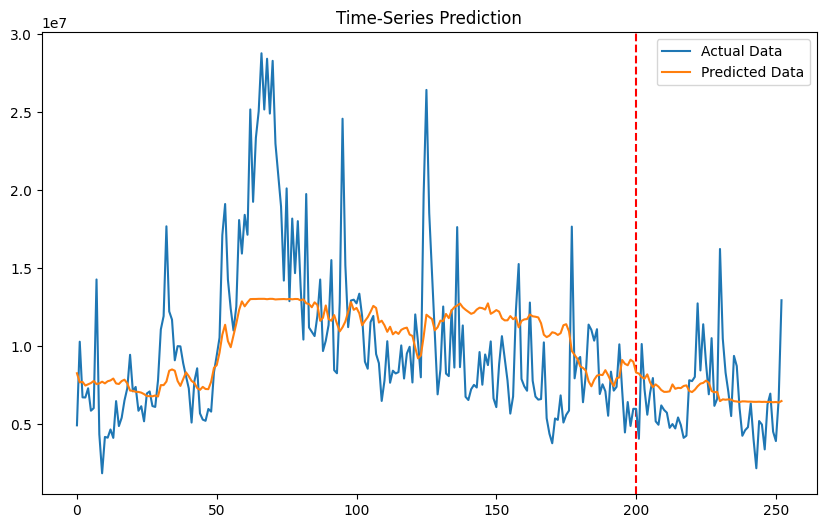

In [41]:
train_predict=model(df_x_ss)
predicted=train_predict.data.numpy()
label_y=df_y_ms.data.numpy()

predicted=ms.inverse_transform(predicted)
label_y=ms.inverse_transform(label_y)
plt.figure(figsize=(10, 6))
plt.axvline(x=200, c='r', linestyle='--')

plt.plot(label_y, label='Actual Data')
plt.plot(predicted, label='Predicted Data')
plt.title('Time-Series Prediction')
plt.legend()
plt.show()

## **7.6 게이트 순환 신경망(GRU)**

### **7.6.1 GRU 구조**

### **7.6.2 GRU 셀 구현**

**라이브러리 호출**

In [42]:
import torch
import torch.nn as nn
import torchvision.transforms as transforms
import torchvision.datasets as dataset
from torch.autograd import Variable
from torch.nn import Parameter
from torch import Tensor
import torch.nn.functional as F
from torch.utils.data import DataLoader
import math

device=torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
cuda=True if torch.cuda.is_available() else False

Tensor=torch.cuda.FloatTensor if cuda else torch.FloatTensor

torch.manual_seed(125)
if torch.cuda.is_available():
    torch.cuda.manual_seed_all(125)

**데이터 전처리**

In [43]:
mnist_transform=transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (1.0,))
])

**데이터셋 내려받기 및 전처리 적용**

In [44]:
from torchvision.datasets import MNIST
download_root=r"C:\Users\User\24-2EURON\MNIST_DATASET"

train_dataset=MNIST(download_root, transform=mnist_transform, train=True,
                    download=True)
valid_dataset=MNIST(download_root, transform=mnist_transform, train=False,
                    download=True)
test_dataset=MNIST(download_root, transform=mnist_transform, train=False,
                   download=True)

**데이터셋 메모리로 가져오기**

In [45]:
batch_size=64
train_loader=DataLoader(dataset=train_dataset,
                        batch_size=batch_size,
                        shuffle=True)
valid_loader=DataLoader(dataset=test_dataset,
                        batch_size=batch_size,
                        shuffle=True)
test_loader=DataLoader(dataset=test_dataset,
                       batch_size=batch_size,
                       shuffle=True)

**변수 값 설정**

In [46]:
batch_size=100
n_iters=6000
num_epochs=n_iters/(len(train_dataset)/batch_size)
num_epochs=int(num_epochs)

**GRU 셀 네트워크**

In [47]:
class GRUCell(nn.Module):
    def __init__(self, input_size, hidden_size, bias=True):
        super(GRUCell, self).__init__()
        self.input_size=input_size
        self.hidden_size=hidden_size
        self.bias=bias
        self.x2h=nn.Linear(input_size, 3*hidden_size, bias=bias)
        self.h2h=nn.Linear(hidden_size, 3*hidden_size, bias=bias)
        self.reset_parameters()
        
    def reset_parameters(self):
        std=1.0/math.sqrt(self.hidden_size)
        for w in self.parameters():
            w.data.uniform_(-std, std)
            
    def forward(self, x, hidden):
        x=x.view(-1, x.size(1))
        
        gate_x=self.x2h(x)
        gate_h=self.h2h(hidden)
        gate_x=gate_x.squeeze()
        gate_h=gate_h.squeeze()
        
        i_r, i_i, i_n=gate_x.chunk(3, 1)
        h_r, h_i, h_n=gate_h.chunk(3, 1)
        
        resetgate=F.sigmoid(i_r+h_r)
        inputgate=F.sigmoid(i_i+h_i)
        newgate=F.tanh(i_n+(resetgate*h_n))
        
        hy=newgate+inputgate*(hidden-newgate)
        return hy

**전반적인 네트워크 구조**

In [ ]:
class GRUModel(nn.Module):
    def __init__(self, input_dim, hidden_dim, layer_dim, output_dim, bias=True):
        super(GRUModel, self).__init__()
        self.hidden_dim=hidden_dim
        self.layer_dim=layer_dim
        
        self.gru_cell=GRUCell(input_dim, hidden_dim, layer_dim)
        self.fc=nn.Linear(hidden_dim, output_dim)
        
    def forward(self, x):
        if torch.cuda.is_available():
            h0=Variable(torch.zeros(self.layer_dim, x.size(0), self.hidden_dim).cuda())